# Importing necessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# Dataset Exploration


In [2]:
df = pd.read_csv('Salary Prediction of Data Professions.csv')
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [3]:
df.shape

(2639, 13)

# EDA (Exploratory data analysis) 

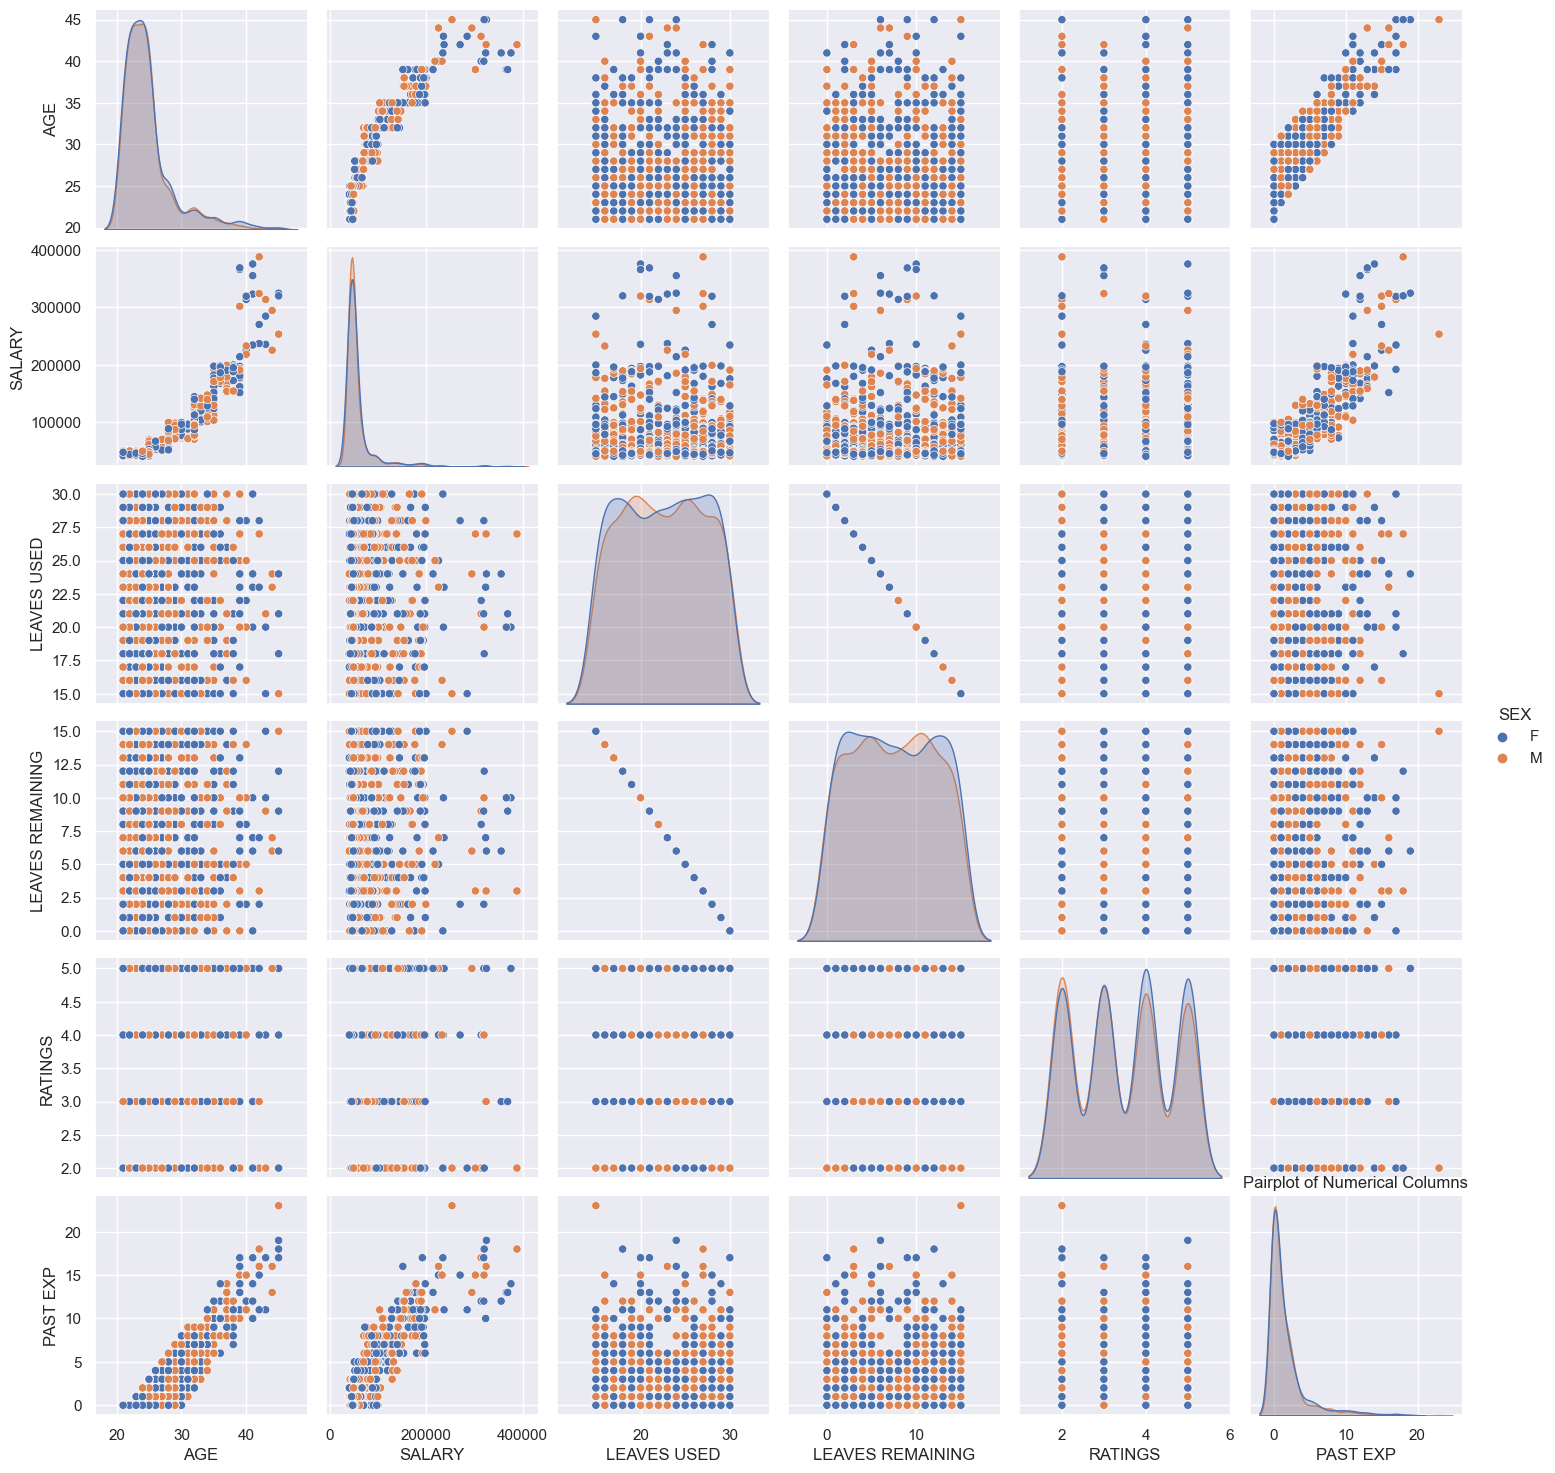

In [4]:
# Pairplot for numerical columns
sns.pairplot(df.dropna(), hue='SEX', diag_kind='kde')
plt.title('Pairplot of Numerical Columns')
plt.show()

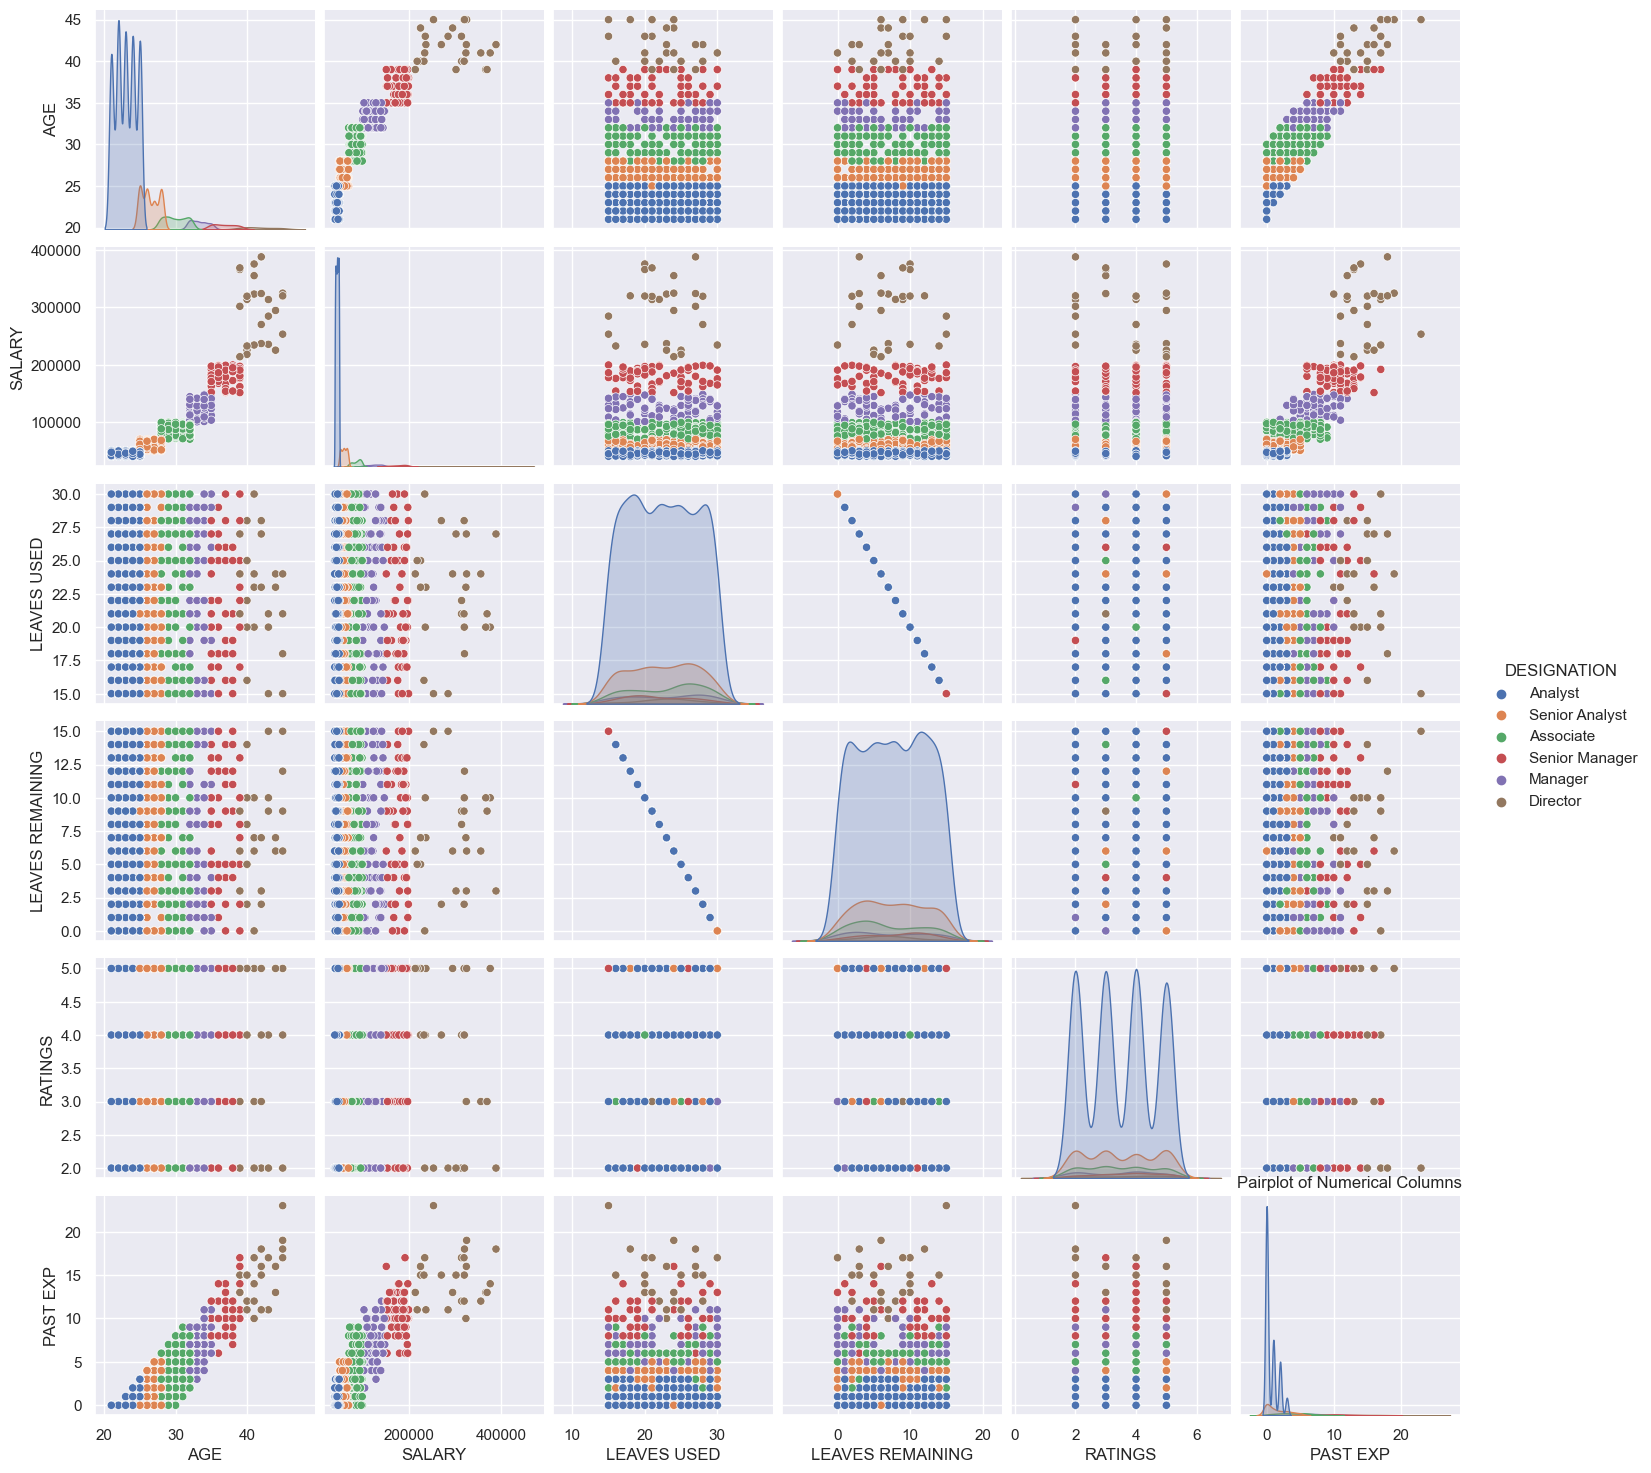

In [5]:
sns.pairplot(df.dropna(), hue='DESIGNATION', diag_kind='kde')
plt.title('Pairplot of Numerical Columns')
plt.show()

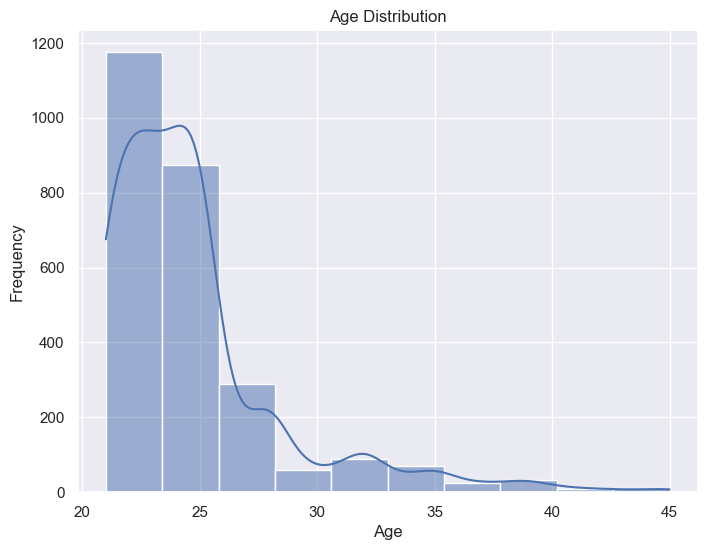

In [6]:
# Distribution plot for Age
plt.figure(figsize=(8, 6))
sns.histplot(df['AGE'].dropna(), kde=True, bins=10)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

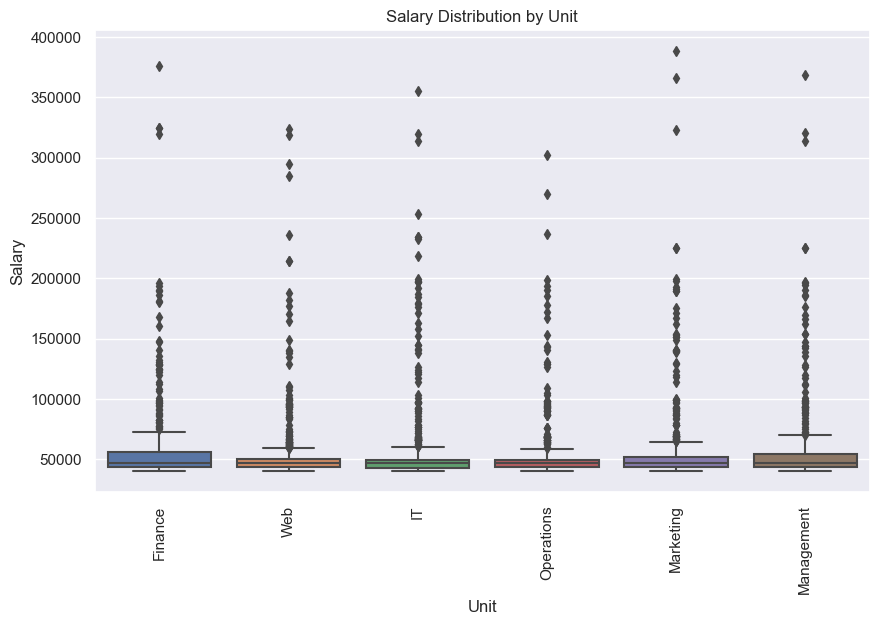

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='UNIT', y='SALARY', data=df)
plt.title('Salary Distribution by Unit')
plt.xlabel('Unit')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

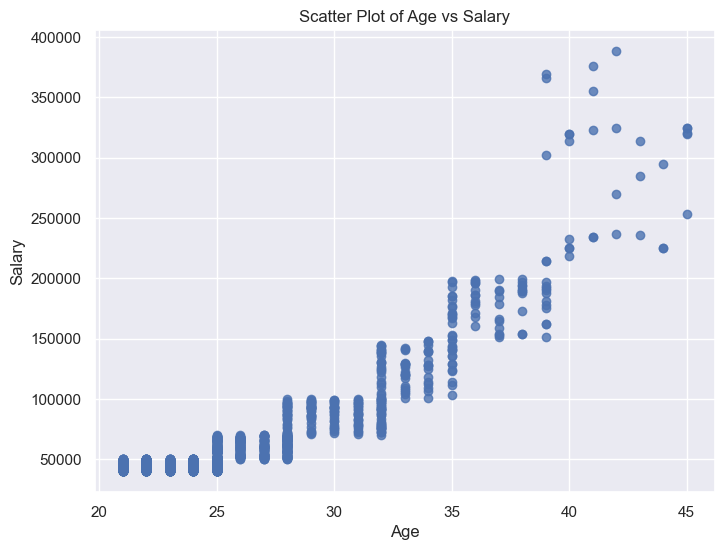

In [8]:
# Scatter plot for Age vs Salary
plt.figure(figsize=(8, 6))
plt.scatter(df['AGE'], df['SALARY'], alpha=0.8)
plt.title('Scatter Plot of Age vs Salary')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

# Feature Engineering

In [9]:
#checking for duplicated values
df.duplicated().sum()

161

In [10]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [11]:
#first name and last name not needed so lets drop them

df.drop(['FIRST NAME', 'LAST NAME'],axis= 1, inplace = True)

In [12]:
df.duplicated().sum()

0

In [13]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


In [14]:
df.nunique()

SEX                    2
DOJ                  967
CURRENT DATE           1
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
dtype: int64

### lets change datatype of `doj` and `current date` to `date_time` format

In [15]:
df['DOJ'] = pd.to_datetime(df['DOJ'], errors='coerce')
df['CURRENT DATE'] = pd.to_datetime(df['CURRENT DATE'], errors='coerce')

In [16]:
df['DOJ'].info()
print("\n")
df['CURRENT DATE'].info()

<class 'pandas.core.series.Series'>
Int64Index: 2478 entries, 0 to 2638
Series name: DOJ
Non-Null Count  Dtype         
--------------  -----         
2477 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.7 KB


<class 'pandas.core.series.Series'>
Int64Index: 2478 entries, 0 to 2638
Series name: CURRENT DATE
Non-Null Count  Dtype         
--------------  -----         
2478 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 38.7 KB


As we can see, the datatype is changed into datatime format.

In [17]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


### Merging DOJ and CURRENT DATE

In [18]:
#doj and current date columns can be merged to one feature (Years of experience in org(YOE_ORG))

df['YOE_ORG'] = (df['CURRENT DATE'] - df['DOJ']).dt.days/365.25

In [19]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.639973
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.445585
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.762491
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.130732


In [20]:
df['YOE_ORG'] = df['YOE_ORG'].round(1) # lets use round to remove large decimals

In [21]:
df.head()

,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG
0,F,2014-05-18,2016-01-07,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6
1,F,NaT,2016-01-07,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,2014-07-28,2016-01-07,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4
3,F,2013-04-03,2016-01-07,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8
4,M,2014-11-20,2016-01-07,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1


In [22]:
# Now lets drop the DOJ and current date columns, since they are not needed anymore
df.drop(['DOJ','CURRENT DATE'], axis=1,inplace=True)

In [23]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1


In [24]:
df.shape

(2478, 10)

In [25]:
# checking for null values
df.isnull().sum()

SEX                 0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
YOE_ORG             1
dtype: int64

In [26]:
df['sum leaves'] = df['LEAVES USED'] + df['LEAVES REMAINING']

In [27]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6,30.0
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4,30.0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8,30.0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1,30.0


In [28]:
df.nunique()

SEX                    2
DESIGNATION            6
AGE                   25
SALARY              2305
UNIT                   6
LEAVES USED           16
LEAVES REMAINING      16
RATINGS                4
PAST EXP              21
YOE_ORG               53
sum leaves             1
dtype: int64

In [29]:
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
count,2475.000000,2478.000000,2475.000000,2476.000000,2476.000000,2478.000000,2477.000000,2473.0
mean,24.727273,58076.235270,22.493737,7.511309,3.481826,1.560129,2.189019,30.0
std,3.912591,36786.661873,4.598805,4.597438,1.115942,2.706363,0.903735,0.0
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000,0.900000,30.0
25%,22.000000,43401.250000,19.000000,4.000000,2.000000,0.000000,1.500000,30.0
50%,24.000000,46733.500000,22.000000,8.000000,3.000000,1.000000,2.100000,30.0
75%,25.000000,50323.750000,26.000000,11.000000,4.000000,2.000000,2.700000,30.0
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000,7.000000,30.0


In [30]:
# its observed that the total number of leaves for every employee is 30, so we can calculate the nan values for them and then drop one of the columns

In [31]:
df[df['LEAVES USED'].isnull()]

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
1,F,Associate,NaN,89207,Web,NaN,13.0,NaN,7,NaN,NaN
11,M,Senior Manager,36.0,160613,Finance,NaN,11.0,2.0,9,5.9,NaN
19,M,Analyst,24.0,44665,Web,NaN,12.0,5.0,0,2.5,NaN


In [32]:
df['LEAVES USED'].fillna(30-df['LEAVES REMAINING'], inplace = True)

In [33]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP,YOE_ORG,sum leaves
0,F,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0,1.6,30.0
1,F,Associate,NaN,89207,Web,17.0,13.0,NaN,7,NaN,NaN
2,F,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0,1.4,30.0
3,F,Analyst,22.0,45550,IT,22.0,8.0,3.0,0,2.8,30.0
4,M,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3,1.1,30.0


In [34]:
#now the leaves remaining column isn't needed since they are clearly highly correlated
df.drop(['LEAVES REMAINING','sum leaves'],axis=1, inplace=True)

In [35]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YOE_ORG
0,F,Analyst,21.0,44570,Finance,24.0,2.0,0,1.6
1,F,Associate,NaN,89207,Web,17.0,NaN,7,NaN
2,F,Analyst,21.0,40955,Finance,23.0,3.0,0,1.4
3,F,Analyst,22.0,45550,IT,22.0,3.0,0,2.8
4,M,Analyst,NaN,43161,Operations,27.0,NaN,3,1.1


In [36]:
df.isnull().sum()

SEX            0
DESIGNATION    0
AGE            3
SALARY         0
UNIT           0
LEAVES USED    0
RATINGS        2
PAST EXP       0
YOE_ORG        1
dtype: int64

In [37]:
print(df['AGE'].median())
print(df['AGE'].mean())

24.0
24.727272727272727


In [38]:
#filling the age, yoe_org and ratings nan values with median values

df['YOE_ORG'].fillna(df['YOE_ORG'].median(), inplace=True)
df['AGE'].fillna(df['AGE'].median(), inplace=True)
df['RATINGS'].fillna(df['RATINGS'].median(), inplace=True)

In [39]:
df.isnull().sum()

SEX            0
DESIGNATION    0
AGE            0
SALARY         0
UNIT           0
LEAVES USED    0
RATINGS        0
PAST EXP       0
YOE_ORG        0
dtype: int64

In [40]:
df.head()

,SEX,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,RATINGS,PAST EXP,YOE_ORG
0,F,Analyst,21.0,44570,Finance,24.0,2.0,0,1.6
1,F,Associate,24.0,89207,Web,17.0,3.0,7,2.1
2,F,Analyst,21.0,40955,Finance,23.0,3.0,0,1.4
3,F,Analyst,22.0,45550,IT,22.0,3.0,0,2.8
4,M,Analyst,24.0,43161,Operations,27.0,3.0,3,1.1


This will be our refined dataset on which we will preprocess

# Data Preprocessing

In [41]:
#separate ind and dep variable
x = df.drop(['SALARY'],axis= 1)
y = df['SALARY']

In [42]:
# #Encoding- OHE

df_encoded = pd.get_dummies(x, columns=['SEX', 'DESIGNATION', 'UNIT'])

In [43]:
df_encoded.head()

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,24.0,2.0,0,1.6,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,24.0,17.0,3.0,7,2.1,1,0,0,1,0,0,0,0,0,0,0,0,0,1
2,21.0,23.0,3.0,0,1.4,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,22.0,22.0,3.0,0,2.8,1,0,1,0,0,0,0,0,0,1,0,0,0,0
4,24.0,27.0,3.0,3,1.1,0,1,1,0,0,0,0,0,0,0,0,0,1,0


In [44]:
df_encoded.astype(float).head()

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,21.0,24.0,2.0,0.0,1.6,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,24.0,17.0,3.0,7.0,2.1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,21.0,23.0,3.0,0.0,1.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,22.0,22.0,3.0,0.0,2.8,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,24.0,27.0,3.0,3.0,1.1,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [45]:
#standardization
from sklearn.preprocessing import StandardScaler
numerical_columns = ['AGE','LEAVES USED','RATINGS','PAST EXP','YOE_ORG']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply standardization to numerical columns
df_encoded[numerical_columns] = scaler.fit_transform(df_encoded[numerical_columns])

In [46]:
x = df_encoded.astype(float)

In [47]:
x

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,-0.953160,0.328786,-1.328226,-0.576583,-0.651983,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.185801,-1.193670,-0.431646,2.010436,-0.098501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.953160,0.111292,-0.431646,-0.576583,-0.873375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.697374,-0.106201,-0.431646,-0.576583,0.676373,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.185801,0.981267,-0.431646,0.532139,-1.205465,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2634,2.883634,-1.628657,1.361513,3.119158,2.558211,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
2635,-0.441587,-1.193670,-1.328226,-0.576583,-0.209197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2636,-0.953160,1.416254,1.361513,-0.576583,-0.209197,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2637,-0.185801,0.111292,-0.431646,-0.207009,-0.430590,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


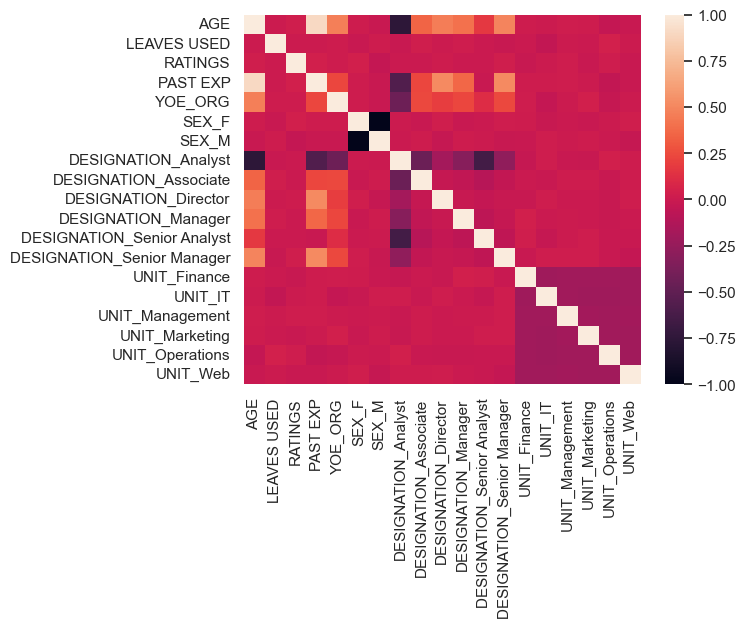

In [48]:
sns.heatmap(x.corr());

In [49]:
x.head()

,AGE,LEAVES USED,RATINGS,PAST EXP,YOE_ORG,SEX_F,SEX_M,DESIGNATION_Analyst,DESIGNATION_Associate,DESIGNATION_Director,DESIGNATION_Manager,DESIGNATION_Senior Analyst,DESIGNATION_Senior Manager,UNIT_Finance,UNIT_IT,UNIT_Management,UNIT_Marketing,UNIT_Operations,UNIT_Web
0,-0.953160,0.328786,-1.328226,-0.576583,-0.651983,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.185801,-1.193670,-0.431646,2.010436,-0.098501,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.953160,0.111292,-0.431646,-0.576583,-0.873375,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,-0.697374,-0.106201,-0.431646,-0.576583,0.676373,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.185801,0.981267,-0.431646,0.532139,-1.205465,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [50]:
y.head()

0    44570
1    89207
2    40955
3    45550
4    43161
Name: SALARY, dtype: int64

In [51]:
#splitting into train and test

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.7, random_state=101)

In [52]:
#Checking feature importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(x,y)

ExtraTreesRegressor()

In [53]:
print(model.feature_importances_)

[0.36963329 0.0054763  0.01009494 0.12499485 0.00679095 0.00117768
 0.00104672 0.04088034 0.02455407 0.26046432 0.02723941 0.01981651
 0.09753129 0.0032996  0.00105461 0.00116126 0.00294146 0.00091856
 0.00092384]


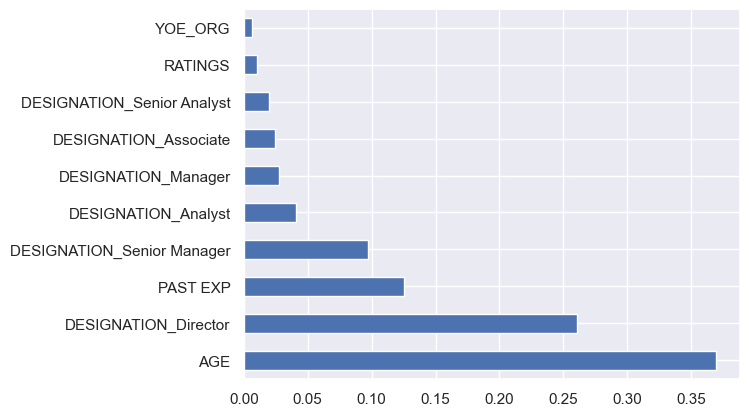

In [54]:
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [55]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [56]:
print(lm.intercept_)

127845.5963124834


In [57]:
coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
coeff_df

,Coefficient
AGE,2527.657967
LEAVES USED,-198.670383
RATINGS,-87.118048
PAST EXP,-2415.770022
YOE_ORG,-474.659705
SEX_F,212.145727
SEX_M,-212.145727
DESIGNATION_Analyst,-82596.574988
DESIGNATION_Associate,-41276.760409
DESIGNATION_Director,142513.163428


In [58]:
predictions = lm.predict(x_test)

In [59]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4352.955914479914
MSE: 73758803.02650191
RMSE: 8588.294535383722


In [60]:
from sklearn.metrics import r2_score

# Calculate R-squared value
r_squared = r2_score(y_test, predictions)
r_squared

0.9469381817189597

In [61]:
## Let's check with cross val score

In [62]:
from sklearn.model_selection import cross_val_score

In [63]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)

res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(lr_model, x, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9469381817189597
cross_val_score:  [0.95487506 0.96154136 0.97024848 0.9381597  0.95111225] 0.9551873702609031 0.010713132675332445


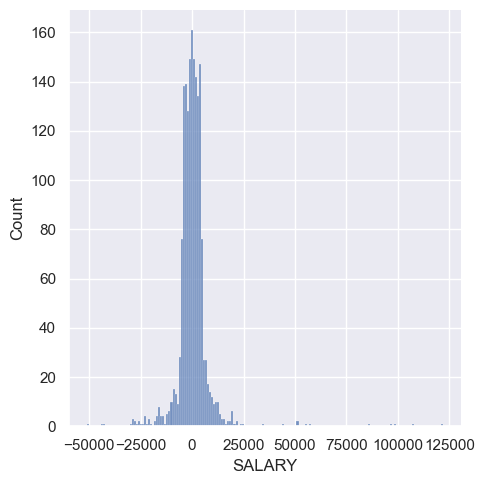

In [64]:
sns.displot(y_test-predictions)

In [65]:
#this closed gaussian dist graph indicates that the difference between predicted and actual values is very minimal

In [66]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(dt_model, x, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9161982603877354
cross_val_score:  [0.9291958  0.92328738 0.88183558 0.8967035  0.90811762] 0.9078279766323014 0.017291727704241835


In [67]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor()
rf_model.fit(x_train, y_train)
y_pred = rf_model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(rf_model, x, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9320911798570453
cross_val_score:  [0.94830637 0.95221335 0.95140896 0.93278356 0.93792237] 0.9445269202795437 0.007775019146409184


In [68]:
import xgboost as xgb

model = xgb.XGBRegressor()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
res = r2_score(y_test, y_pred)
print(res)

score = cross_val_score(model, x, y, cv=5, scoring='r2')

print('cross_val_score: ', score, score.mean(), score.std())

0.9282706595870082
cross_val_score:  [0.92283859 0.93497012 0.92948242 0.93299933 0.91394378] 0.9268468490196561 0.007659529361384773


In [69]:
#LIN Reg model gives the best r2 score

In [70]:
#dropping the designation_analyst column since it was highly correlted, and there was no significant improvement

# Salary Prediction Model

## Testing

In [71]:
#predicting on unknown values

pre=[-0.176523,-1.654231,-2.234765,0.213225,-0.993421,0,1,1,0,0,0,0,0,0,1,0,0,0,0]
pre_reshaped = np.array(pre).reshape(1, -1)
lr_model.predict(pre_reshaped)

array([44701.66944042])

## Saving model using pickle

In [72]:
import pickle

file = open('linreg_model.pkl','wb')

#dump info to that file
pickle.dump(lr_model, file)

# Thank you

If you enjoyed this notebook, please consider sharing it.

**Author:**

Sri Charan Thoutam
- 👉Shoot me mails : thoutamsricharan@gmail.com
- 👉Connect on LinkedIn: [linkedin.com/in/codewithcharan](https://www.linkedin.com/in/codewithcharan/)
- 👉Explore my Portfolio: [codewithcharan.github.io/My-Portfolio](https://codewithcharan.github.io/My-Portfolio/)
- 👉Explore my GitHub: [github.com/CodeWithCharan](https://github.com/CodeWithCharan)